## Context and goals:
Brazil has 24.000 dams. The government is making a effort to control and label the dams according to low, medium and high risk, but there are two big problems: 1. the risk criteria demands several features that are hard to collect and measure; 2. the governemnt does not have enough regulatory institutions and qualified workers to visit all of them, collect information and label the risk manually.  
Therefore, this project goal will be pre-label as many dams as possible, so the government can focus on prioritize the inspection on the higher risk ones. 

## To dos:

1. Drop unrelated columns
2. Check nulls
3. text cleaning

1. prepare categorical data (one-hot- enconding)
2. organize numerical data (standard scaler)
3. study the 'less features' thing

1. to go further: there are only 10 accidents in BR (I can't find the number of incidents). Is it possible to predict the probabilities for the next one with the poor dataset that I have?


## Libraries and Dataframe

In [442]:
import pandas as pd
import numpy as np
import seaborn as sns

In [443]:
pd.set_option('display.max_rows', 100)
df = pd.read_excel('SNISB 2018.xlsx', sheet_name='Cadastro')

In [444]:
#df.isnull().sum().sort_values()

## drop columns
not necesseary features to execute machine learning
(but necessary for statiscal graphs, specially to show the precarious control situation)

In [445]:
#deleted because this is register info
df.drop(columns=['Codigo_barragem_Fiscalizador', 'Autorizacao_Numero',
                 'CNARH_Numero', 'Barragem_NomeSecundario', 'Empreendedor_Nome',
                 'Empreendedor_Sigla', 'Empreendedor_CNPJ',
       'Empreendedor_CPF', 'Empreendedor_endereco', 'Empreendedor _e-mail',
       'Empreendedor_telefone', 'Empreendedor_telefone alternativo',             
                 'Cursodagua_barrado', 'Bacia_Hidrografica', 'UnidadeGestaoRecursosHidricos',
                 'Datum', 'Empreendedor Identificado?'], inplace=True)

In [446]:
#deleted because this is unnecessary info for machine learning
df.drop(columns=['Codigo_barragem_SNISB','Autorizacao_Data_emissao_publicacao',
           'Autorizacao_Data_validade','Uso_Complementar','Regiao_Hidrografica_CNRH','Latitude_dec',
           'Longitude_dec','Dominio_Curso_Dagua','DataUltimaInspecao','TipoUltimaInspecao',
           'ComentariosObservacoes','Órgão fiscalizador','Barragem Pública ou particular','Barragem Outorgada?',
           'Tem informação de altura?','Tem informação de volume?','Tem informação de altura e volume?',
           'classificada quanto ao CRI?','classificada quanto ao DPA?','Houve alguma inspeção no período deste RSB?',
           'Cadastrada no SNISB?','N','sequência'], inplace=True)

In [447]:
#deleted because there are too many nulls when filtering by risk criteria
df.drop(columns=['Construcao_Data_Inicio', 'Barragem_Altura_AcimaBaseFundacao','Classe Residuo', 'Barragem_nivel_de_perigo',
                 'Barragem_Classe', 'DataUltimaFiscalização', 'Barragem_Principal_Tipo_estrutural','VazaoProjeto_OrgaoExtravasor',
                 'CriterioVazaoProjeto_OrgaoExtravasor','ExtravasorControle'], inplace = True)


## Dtype organization

In [448]:
# ISSUE !!!! FORM SUBMITTED.
# I only want (and really need) the years,but this series is a mess. I don't know how to loop that.

df['Construcao_Data_Fim'].unique()

array([nan, datetime.datetime(1999, 3, 1, 0, 0),
       datetime.datetime(2016, 12, 29, 0, 0), ...,
       datetime.datetime(1992, 9, 1, 0, 0),
       datetime.datetime(1994, 3, 21, 0, 0),
       datetime.datetime(2012, 9, 26, 0, 0)], dtype=object)

In [449]:
df["Barragem_Altura_AcimaNivelTerreno"] = pd.to_numeric(df["Barragem_Altura_AcimaNivelTerreno"], errors='coerce')

In [450]:
df["Barragem_Capacidade"] = pd.to_numeric(df["Barragem_Capacidade"], errors='coerce')

In [451]:
#df.dtypes

## Text cleaning 

In [452]:
df['Barragem_Principal_Tipo_material'] = df['Barragem_Principal_Tipo_material'].str.lower()
df['Barragem_Principal_Tipo_material'] = df['Barragem_Principal_Tipo_material'].replace('terra ','terra')
df['Barragem_Principal_Tipo_material'] = df['Barragem_Principal_Tipo_material'].replace('alvenaria ','alvenaria')
df['Barragem_Principal_Tipo_material'] = df['Barragem_Principal_Tipo_material'].replace('sem informação', np.nan)
df['Barragem_Principal_Tipo_material'].value_counts()
df['Barragem_Principal_Tipo_material'].isnull().sum() #10735 nulls

10735

In [453]:
df['Uso_principal'] = df['Uso_principal'].str.lower()
df['Uso_principal'].value_counts()
df['Uso_principal'].isnull().sum() #0 nulls

0

In [454]:
df['Barragem_UF'] = df['Barragem_UF'].str.upper()
df['Barragem_UF'].value_counts()
df['Barragem_UF'].isnull().sum()

0

In [455]:
df['Barragem_Categoria_Risco'] = df['Barragem_Categoria_Risco'].str.lower()
df['Barragem_Categoria_Risco'] = df['Barragem_Categoria_Risco'].replace('médio ','médio')
df['Barragem_Categoria_Risco'] = df['Barragem_Categoria_Risco'].replace('baixo ','baixo')
df['Barragem_Categoria_Risco'] = df['Barragem_Categoria_Risco'].replace('não classificada', np.nan)
df['Barragem_Categoria_Risco'].value_counts()
df['Barragem_Categoria_Risco'].isnull().sum() #12518 nulls

12518

In [456]:
df['Barragem_Dano_Potencial_Associado'] = df['Barragem_Dano_Potencial_Associado'].str.lower()
df['Barragem_Dano_Potencial_Associado'] = df['Barragem_Dano_Potencial_Associado'].replace('médio ','médio')
df['Barragem_Dano_Potencial_Associado'] = df['Barragem_Dano_Potencial_Associado'].replace('baixo ','baixo')
df['Barragem_Dano_Potencial_Associado'] = df['Barragem_Dano_Potencial_Associado'].replace('não classificada', np.nan)
df['Barragem_Dano_Potencial_Associado'].unique()
df['Barragem_Dano_Potencial_Associado'].value_counts()
df['Barragem_Dano_Potencial_Associado'].isnull().sum() #11027 nulls

11027

In [457]:
df['TemPAE'] = df['TemPAE'].str.lower()
df['TemPAE'] = df['TemPAE'].replace('não ','não')
df['TemPAE'] = df['TemPAE'].replace('nãose aplica','não se aplica')
df['TemPAE'] = df['TemPAE'].replace('sem informação',np.nan)
df['TemPAE'].value_counts()
df['TemPAE'].isnull().sum() #11199 nulls

11199

In [458]:
df['TemPlanoSeguranca'] = df['TemPlanoSeguranca'].str.lower()
df['TemPlanoSeguranca'] = df['TemPlanoSeguranca'].replace('sem informação',np.nan)
df['TemPlanoSeguranca'].value_counts()
df['TemPlanoSeguranca'].isnull().sum() #11140 nulls

11140

In [459]:
df['TemRevisaoPeriodica'] = df['TemRevisaoPeriodica'].str.lower()
df['TemRevisaoPeriodica'] = df['TemRevisaoPeriodica'].replace('sem informação',np.nan)
df['TemRevisaoPeriodica'].value_counts()
df['TemRevisaoPeriodica'].isnull().sum() #11883 nulls

11883

In [460]:
df['ExtravasorControle'].value_counts()
df['ExtravasorControle'] = df['ExtravasorControle'].str.lower()
df['ExtravasorControle'] = df['ExtravasorControle'].replace('comporta manual','com comporta de acionamento mecânico')
df['ExtravasorControle'] = df['ExtravasorControle'].replace('sem informação',np.nan)
df['ExtravasorControle'].isnull().sum()


15254

In [461]:
df['TemProjetoExecutivo'] = df['TemProjetoExecutivo'].str.lower()
df['TemProjetoExecutivo'] = df['TemProjetoExecutivo'].replace('não ','não')
df['TemProjetoExecutivo'] = df['TemProjetoExecutivo'].replace('sim ','sim')
df['TemProjetoExecutivo'] = df['TemProjetoExecutivo'].replace('sem informação',np.nan)
df['TemProjetoExecutivo'].value_counts()
df['TemProjetoExecutivo'].isnull().sum() #13005

13005

In [462]:
df['TemProjetoComo construido'] = df['TemProjetoComo construido'].str.lower()
df['TemProjetoComo construido'] = df['TemProjetoComo construido'].replace('não ','não')
df['TemProjetoComo construido'] = df['TemProjetoComo construido'].replace('sem informação',np.nan)
df['TemProjetoComo construido'].isnull().sum() #11314
df['TemProjetoComo construido'].unique()

array(['não', 'sim', nan], dtype=object)

In [463]:
df['TemProjetoBasico'] = df['TemProjetoBasico'].str.lower()
df['TemProjetoBasico'] = df['TemProjetoBasico'].replace('não ','não')
df['TemProjetoBasico'] = df['TemProjetoBasico'].replace('sem informação',np.nan)
df['TemProjetoBasico'].unique()
df['TemProjetoBasico'].isnull().sum() #12809

12809

In [464]:
df['TemProjetoConceitual'] = df['TemProjetoConceitual'].str.lower()
df['TemProjetoConceitual'] = df['TemProjetoConceitual'].replace('não ','não')
df['TemProjetoConceitual'] = df['TemProjetoConceitual'].replace('sem informação',np.nan)
df['TemProjetoConceitual'].unique()
df['TemProjetoConceitual'].isnull().sum() #13003

13003

In [465]:
df['TemEclusa'] = df['TemEclusa'].str.lower()
df['TemEclusa'] = df['TemEclusa'].replace('não ','não')
df['TemEclusa'] = df['TemEclusa'].replace('sem informação',np.nan)
df['TemEclusa'].unique()
df['TemEclusa'].isnull().sum() #564

564

In [466]:
df['Barragem_FasedeVida'] = df['Barragem_FasedeVida'].str.lower()
df['Barragem_FasedeVida'].unique()
df['Barragem_FasedeVida'].isnull().sum() #0

0

In [467]:
df['ReguladaPNSB'] = df['ReguladaPNSB'].str.lower()
df['ReguladaPNSB'] = df['ReguladaPNSB'].replace('não ','não')
df['ReguladaPNSB'] = df['ReguladaPNSB'].replace('sem informação',np.nan)
df['ReguladaPNSB'].unique()
df['ReguladaPNSB'].isnull().sum() #10812

10812

In [468]:
df['Barragem_autuada?'] = df['Barragem_autuada?'].str.lower()
df['Barragem_autuada?'] = df['Barragem_autuada?'].replace('sem informação',np.nan)
df['Barragem_autuada?'].unique()6h

array([nan, 'sim', 'não'], dtype=object)

## drop nans 

In [471]:
df = df.dropna(subset=['Barragem_Nome'])
df = df.dropna(subset=['ReguladaPNSB'])
df = df.dropna(subset=['Barragem_Altura_AcimaNivelTerreno', 'Barragem_Principal_comprimento'])

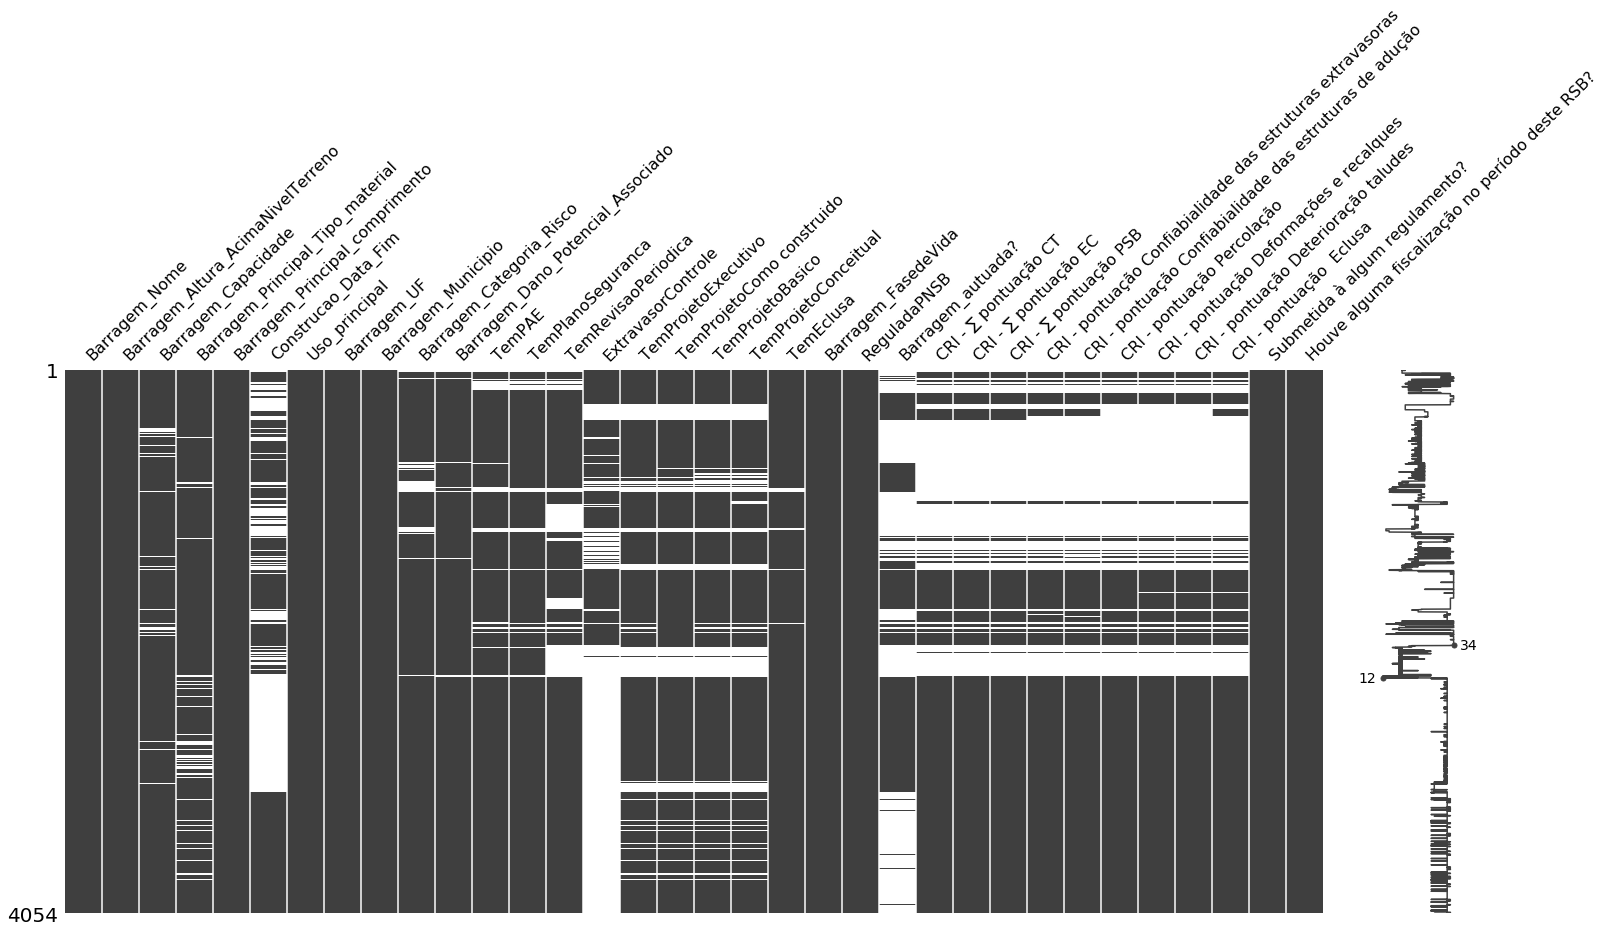

In [472]:
import missingno as msno
msno.matrix(df)

In [432]:
#check what is left:
dropnas = df.dropna()
dropnas # only 567 dams have every all the information filled.
dropnas.head(20)

,Barragem_Nome,Barragem_Altura_AcimaNivelTerreno,Barragem_Capacidade,Barragem_Principal_Tipo_material,Barragem_Principal_comprimento,Construcao_Data_Fim,Uso_principal,Barragem_UF,Barragem_Municipio,Barragem_Categoria_Risco,...,CRI - ∑ pontuação EC,CRI - ∑ pontuação PSB,CRI - pontuação Confiabialidade das estruturas extravasoras,CRI - pontuação Confiabialidade das estruturas de adução,CRI - pontuação Percolação,CRI - pontuação Deformações e recalques,CRI - pontuação Deterioração taludes,CRI - pontuação Eclusa,Submetida à algum regulamento?,Houve alguma fiscalização no período deste RSB?
2148,Barragem da Fazenda Rio Verde,8.00,1.168129,terra,445.0,1997-10-17 00:00:00,irrigação,MT,SORRISO,médio,...,4.0,21.0,0.0,0.0,3.0,0.0,1.0,0.0,Sim,Não
2813,Zumbi,18.00,1.700000,terra,280.0,1975,abastecimento humano,PE,Camutanga,alto,...,36.0,33.0,10.0,6.0,5.0,8.0,7.0,0.0,Sim,Não
2818,Guararema,30.00,20.700000,concreto compactado a rolo (ccr),180.0,2001,abastecimento humano,PE,Itambé,baixo,...,9.0,14.0,0.0,6.0,3.0,0.0,0.0,0.0,Sim,Não
3342,PRATA,19.49,9.321000,terra,530.2,2006,irrigação,RN,Goianinha,baixo,...,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,sim,Não
3478,URUCARÁ,19.40,4.524000,terra,379.0,2006,irrigação,RN,Arês,médio,...,11.0,12.0,4.0,0.0,5.0,1.0,1.0,0.0,sim,Não
4271,JACURUTU I,9.50,0.053000,terra,135.0,2012,dessedentação animal,TO,PONTE ALTA DO TOCANTINS,baixo,...,8.0,5.0,0.0,0.0,3.0,0.0,5.0,0.0,sim,Sim
4389,ESTRELA SOLITÁRIA II,15.30,0.015000,terra,332.0,2014,aquicultura,TO,ARAPOEMA,médio,...,14.0,14.0,4.0,0.0,3.0,0.0,5.0,0.0,sim,Sim
4394,ÁGUAS CLARAS,9.20,0.068890,terra,202.5,2014,dessedentação animal,TO,BRASILÂNDIA DO TOCANTINS,médio,...,10.0,12.0,0.0,0.0,5.0,0.0,5.0,0.0,sim,Sim
4423,SANTA CLARA IV - SEDE,5.00,0.014400,terra,100.0,2007,dessedentação animal,TO,DOIS IRMÃOS DO TOCANTINS,baixo,...,1.0,12.0,0.0,0.0,0.0,0.0,1.0,0.0,sim,Sim
4426,HEXA I,12.00,0.961720,terra,333.0,2016,irrigação,TO,ALVORADA,médio,...,8.0,19.0,0.0,0.0,3.0,0.0,5.0,0.0,sim,Sim


In [ ]:
#consider fill with means when possible.